## Intro: Poisson Likelihood + Gamma Prior -> Gamma Posterior
### Setup
Assume we have $X1, X_2, \dots, X_n$ independent and identically distributed (i.i.d) Poisson distribution. So, 

$$X_i \sim \text{Pois}(\lambda) \text{ for all } i.$$

You can imagine $x_i$ as counting the number of telephone calls in day $i$, which follows a Poisson distribution, where $\lambda$ is the (unknown) average number of phone calls a day.

**Goal:** We want to conduct Bayesian inference on the data $x1, \dots, x_n$ in order to infer the unknown parameter $\lambda$.

### a. Likelihood $p(x | \lambda)$
The pmf of Poisson is 

$$p(x | \lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}.$$

Therefore, by i.i.d. assumption, the joint likelihood of all the $n$ pieces of data will be the product of the pmf, simplified for you here
$$p (x1, \dots, x_n) = \frac{\lambda^{x1 + \dots  + x_n} e^{-n\lambda}}{x1! \dots x_n!}.$$

### b. Prior $p(\lambda)$
Remember, we don't know what $\lambda$ is, so we will treat it as a random variable $\Lambda$ (this is capital letter for $\lambda$). Magically, if we let $\Lambda$ follow a Gamma distribution, we get a nice posterior, so we will do just that. Now, the pdf of gamma(shape=$\alpha$, rate=$\beta$) is

$$p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda},$$

where $\Gamma(\cdot)$ is the gamma function. When you choose your prior, **choose any $\alpha >0, \beta>0$ that is suitable for the prior knowledge you have about the data**. See section notes if you feel unfamiliar about it.

_Do not be intimidated by this crazy formula! It will be very friendly to us in the end of the calculation. Question: doesn't the gamma distribution look kind of similar to the Poisson distribution? This may give us a sense that the posterior will be nice! :)_

### c. Posterior $p(\lambda | x)$
We're almost done. 

Recall: The formula of the posterior distribution is
$$
p(\lambda | x) = \frac{p(x|\lambda)p(\lambda)}{\int_{\lambda}p(x|\lambda)p(\lambda)d\lambda} = \frac{\text{likelihood} \cdot \text{prior}}{\text{normalizing constant}}.
$$
We will skip the algebra and just tell you that 
$$
p(\lambda | x) = \frac{\lambda^{{\color{blue}{x1 + \dots + x_n + \alpha}} - 1} e^{-({\color{blue}{n + \beta}})\lambda}}{\text{normalizing constant}}.
$$
The normalizing constant is not very important, the **MAIN TAKEAWAY IS THAT THE POSTERIOR IS ALSO DISTRIBUTED GAMMA! :)** In fact, the posterior is 
$$
\text{gamma}(x1 + \dots + x_n + \alpha, n + \beta).
$$

### Summary
- Likelihood $p(x | \lambda) \sim \text{Pois}(\lambda)$
- Prior $p(\lambda) \sim \text{gamma}(\alpha, \beta)$
- Posterior $p(\lambda | x)\sim \text{gamma}(x1 + \dots + x_n + \alpha, n + \beta)$



In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm
import math

# 0 Data
Run the following two code cells.

You will perform bayesian analysis on two different sets of data and using two different priors, for a total of 4 cases.

Let the full data ($n=30$) be
$$
x = [ 8,  8,  7, 11, 10,  6,  7, 11,  5, 12,  8,  7,  8,  8, 11,  4,  3,
        9,  9,  4,  7,  7,  9, 12,  8,  9, 10,  9,  8,  8]
$$
Define:
- ```x```, the original 30 data points
- ```x_short```, only the first 3 data points



In [18]:
x = [ 8,  8,  7, 11, 10,  6,  7, 11,  5, 12,  8,  7,  8,  8, 11,  4,  3,  9,  9,  4,  7,  7,  9, 12,  8,  9, 10,  9,  8,  8]
n = len(x)
print('n:', n, '\nmean:', np.mean(x))

n: 30 
mean: 8.1


In [19]:
x_short = x[:3]
n_short = len(x_short)
print('x_short:', x_short)
print('n_short:', n_short, '\nmean x_short:', np.round(np.mean(x_short),2))

x_short: [8, 8, 7]
n_short: 3 
mean x_short: 7.67


# 1 Peaked Prior

Recall the story about inferring the average number of phone calls. First, we want to create a (peaked) prior that reflects our belief about what the data (number of phone calls) is.     

Suppose Mrs. Morgan said, "From my experience and memory, I think the average number of phone calls every day is 4. Most of the time (like 95% of the time), it's between 2 to 6 calls every day."

## 1.1 Prior
**Task:**
1. [2 pt] Define appropriate ```alpha_prior1```, ```beta_prior1``` to obtain a suitable prior gamma($\alpha, \beta$) with appropriate mean and variance. 

    (Hint: for gamma($\alpha, \beta$)
    - mean = $\frac{\alpha}{\beta}$ and variance = $\frac{\alpha}{\beta^2}$. 
    - It may also be easier to define $\beta$ before defining $\alpha$.)
2. [1 pt] Compute ```prior1```, which is the pdf of gamma($\alpha, \beta$) along the $\lambda$-axis `lamb`. 
    - Make sure you read the scipy documentation correctly and input the correct arguments (rate and scale are reciprocals of each other!).
3. [1 pt] Plot the density of the prior.

16.0 4.0


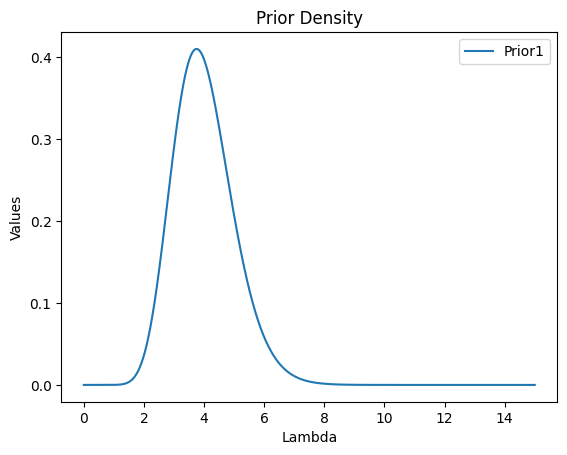

In [20]:
# TODO alpha and beta
#mean is 4
#beta * 4 = alpha
#max is 6 and min is 2 -> std deviation is 2
#varaicene is 1
#beta * beta * 1 = alpha
#beta * 1 = 4
#alpha = 16

mean = 4
variance = 1 # Variance = (b-a)^2 / 4
beta_prior1 = mean / variance
alpha_prior1 = mean * beta_prior1
print(alpha_prior1, beta_prior1)

# TODO prior1
lamb = np.linspace(0, 15, 1000)
#gamma = scipy.special.gamma(alpha_prior1)
#prior1 = (math.pow(beta_prior1,alpha_prior1) * math.pow(lamb,(alpha_prior1 -1))  * math.pow(-(2.7182,beta_prior1*lamb)) )/ gamma
prior1 = stats.gamma.pdf(lamb,alpha_prior1, scale=1/beta_prior1)
#print(prior1)

# TODO plot
plt.plot(lamb,prior1)
plt.xlabel('Lambda')
plt.ylabel('Values')
plt.title('Prior Density')
plt.legend(['Prior1'])
plt.show()

## 1.2 Posterior parameters
Let the posterior parameters be
- ```alpha_post1```, be the posterior shape for full data ```x```.
- ```beta_post1```, be the posterior rate for full data ```x```.
- ```alpha_post1_short```, be the posterior shape for short data ```x_short```.
- ```beta_post1_short```, be the posterior rate for short data ```x_short```.

**Task:**

[2 pt] Define ```alpha_post1```, ```beta_post1```, ```alpha_post1_short```, and ```beta_post1_short``` using the formula in the introduction.

In [21]:
# TODO alpha, beta
alpha_post1 = alpha_prior1 + sum(x)
beta_post1 = beta_prior1 + len(x)

alpha_post1_short = alpha_prior1 + sum(x_short)
beta_post1_short = beta_prior1 + len(x_short)

print(alpha_post1,beta_post1,alpha_post1_short,beta_post1_short)

259.0 34.0 39.0 7.0


## 1.3 Posterior plot

**Task:**

1. [2 pt] Define ```posterior1``` and ```posterior1_short```, the respective pdf of the posteriors. 
    - Use the same horizontal axis ```lamb``` from previous parts.
2. [1 pt] Plot the three densities (prior1, posterior1, posterior1_short) on the same figure.

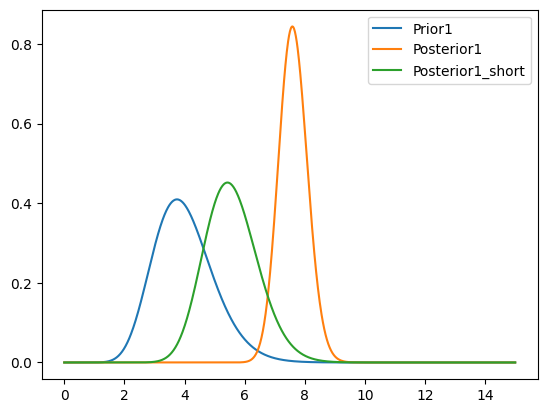

In [22]:
# TODO posterior densities
posterior1 =  stats.gamma.pdf(lamb,alpha_post1, scale=1/beta_post1)
posterior1_short =  stats.gamma.pdf(lamb,alpha_post1_short, scale=1/beta_post1_short)
#print(posterior1,posterior1_short)

# TODO plot
plt.plot(lamb,prior1)
plt.plot(lamb,posterior1)
plt.plot(lamb,posterior1_short)
plt.legend(['Prior1','Posterior1','Posterior1_short'])
plt.show()

## 1.4 Peaked MAP
**Task:**

1. [1 pt] Compute the MAP estimator for both posteriors, storing it as ```lamb_MAP1``` and ```lamb_MAP1_short```. 

2. [1 pt] Print both these values, rounded to 3 decimal places.

In [23]:
# TODO MAP
lamb_MAP1 = lamb[np.argmax(posterior1)]
lamb_MAP1_short = lamb[np.argmax(posterior1_short)]

# TODO print
print(round(lamb_MAP1,3))
print(round(lamb_MAP1_short,3))

7.583
5.435


## 1.5 Discuss MAP
[2 pt] What do you observe about the MAP estimator for the full data and short data? Which is "closer" to the prior? Give an explanation for your observations.

**Ans:** We can observe that the value of MAP for the larger data has a higher value indicating stronger confirdence in estimate, more precision, and consistency. It shows that the prior distribution is skewed and concentrated towards smaller values of lambda. In this case, if the MAP estimator for the short data (0.352) is closer to the prior value, it shows that the observed short data did not provide strong evidence to shift the estimate away from the prior assumption of smaller lambda values.



# 2 Flat Prior
Now, compare the peaked prior to the next procedure, which assumes a prior that is very neutral, i.e., flat prior.

But we want to the prior to still be gamma, so we choose parameters accordingly to look essentially flat.

## 2.1 Prior
**Task:**
1. [2 pt] Define appropriate ```alpha_prior2```, ```beta_prior2``` to obtain a prior gamma($\alpha, \beta$) with mean 15 and variance 100. 
2. [1 pt] Compute ```prior2```, which is the pdf of gamma($\alpha, \beta$). 
    - Make sure you read the scipy documentation correctly and input the correct arguments (rate and scale are reciprocals of each other!). 
    - Use the same ```lamb``` as before.
3. [1 pt] Plot the density of the prior.

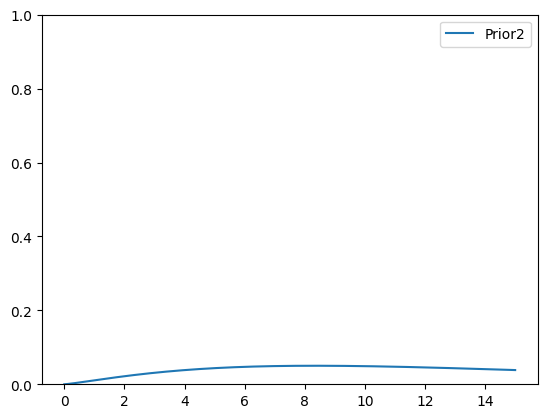

In [24]:
# TODO alpha, beta
#beta * beta * variance = alpha
# beta * mean = alpha
#beta * beta * root(10) = alpha
# beta * 15 = alpha
#beta = .15
#alpha = 2.25

#beta_prior2 = 1.5
#alpha_prior2 = 22.5

beta_prior2 = .15
alpha_prior2 = 2.25

# TODO prior
prior2 = stats.gamma.pdf(lamb,alpha_prior2,scale=1/beta_prior2)
#print(prior2)

# TODO plot
plt.plot(lamb,prior2)
plt.legend(['Prior2'])
plt.ylim(0,1)
plt.show()


## 2.2 Posterior parameters
Like before, you will perform bayesian analysis on ```x``` and ```x_short```.

Let the posterior parameters be
- ```alpha_post2```, be the posterior shape for full data ```x```.
- ```beta_post2```, be the posterior rate for full data ```x```.
- ```alpha_post2_short```, be the posterior shape for short data ```x_short```.
- ```beta_post2_short```, be the posterior rate for short data ```x_short```.

**Task:**

[2 pt] Define ```alpha_post2```, ```beta_post2```, ```alpha_post2_short```, and ```beta_post2_short``` using the formula in the introduction.

In [25]:
# TODO alpha, beta
alpha_post2 = alpha_prior2 + sum(x)
beta_post2 = beta_prior2 + len(x)

alpha_post2_short = alpha_prior2 + sum(x_short)
beta_post2_short = beta_prior2 + len(x_short)

## 2.3 Posterior plot
**Task:**

1. [2 pt] Define ```posterior2``` and ```posterior2_short```, the respective pdf of the posteriors. 
    - Use the same horizontal axis ```lamb``` from previous parts.
2. [1 pt] Plot the three densities (prior2, posterior2, posterior2_short) on the same figure.

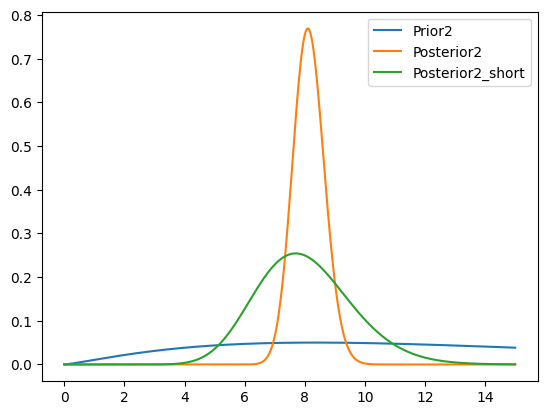

In [29]:
# TODO posterior
posterior2 = stats.gamma.pdf(lamb,alpha_post2,scale = 1/beta_post2)
posterior2_short = stats.gamma.pdf(lamb,alpha_post2_short,scale= 1/beta_post2_short)

# TODO plot
plt.plot(lamb,prior2)
plt.plot(lamb,posterior2)
plt.plot(lamb,posterior2_short)
plt.legend(['Prior2','Posterior2','Posterior2_short'])
plt.show()

## 2.4 Flat MAP
**Task:**

1. [1 pt] Compute the MAP estimator for both posteriors, storing it as ```lamb_MAP2``` and ```lamb_MAP2_short```. 

2. [1 pt] Print both these values, rounded to 3 decimal places.

In [27]:
# TODO MAP
#lamb_MAP2 = max(posterior2)
#lamb_MAP2_short = max(posterior2_short)

lamb_MAP2 = lamb[np.argmax(posterior2)]
lamb_MAP2_short = lamb[np.argmax(posterior2_short)]

# TODO print
print('lamb_MAP_flat      :', np.round(lamb_MAP2,3))
print('lamb_MAP_flat_short:', np.round(lamb_MAP2_short,3))

lamb_MAP_flat      : 8.108
lamb_MAP_flat_short: 7.703


# 3 Compare choice of prior with full data (n=30)
Run the cell below and produce the correct plots. You should not need to change any code here.

[1 pt] With sufficiently large amount of data, does it seem to matter very much what the prior is? What difference between MAP estimators for peaked and flat priors do you expect when even more data is used for computing the posteriors (e.g., $n$=50, 100, etc.)?

**Ans:** With a large amount of data, the prior's influence diminishes, and the posterior is primarily determined by the data. Thus, differences between MAP estimators for peaked and flat priors decrease with more data, as the data's influence outweighs the prior's effect.

So for prior we wont see any significant difference, but for posterior there would be.

lamb_MAP1  : 7.583
lamb_MAP2  : 8.108
true lambda: 8.000


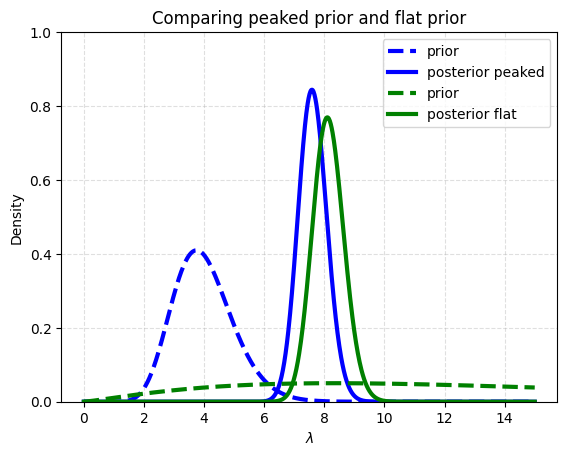

In [28]:
# MAP
print('lamb_MAP1  :', np.round(lamb_MAP1,3))
print('lamb_MAP2  :', np.round(lamb_MAP2,3))
print('true lambda: 8.000')

# plot
plt.plot(lamb, prior1, 'b--', linewidth=3, label='prior')
plt.plot(lamb, posterior1, 'b', linewidth=3, label='posterior peaked')
plt.plot(lamb, prior2, 'g--', linewidth=3, label='prior')
plt.plot(lamb, posterior2, 'g', linewidth=3,label='posterior flat')
plt.title(f'Comparing peaked prior and flat prior'); 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'Density')
plt.grid(alpha=.4, linestyle='--'); plt.legend()
plt.ylim([0,1])
plt.show()
